In [175]:
import sys
import os
import pandas as pd
import numpy as np
from gatspy import periodic

df = pd.read_csv('stripe82-class/data/AllLCs/LC_13350.csv',header=None,sep=' ')
df = df[df.ix[:,2] >= 0]
df.head()


,0,1,2,3
0,51075.298978,r,17.824,0.006
1,51075.299811,i,17.701,0.008
2,51075.300645,u,19.323,0.030
3,51075.301478,z,17.655,0.021
4,51075.302311,g,18.113,0.006


In [ ]:
time = np.array(map(float,df.ix[:,0].values))
mags = np.array(map(float,df.ix[:,2].values))
dmags = np.array(map(float,df.ix[:,3].values))
filters = np.array(df.ix[:,1].values)
masks = [(filters == band) for band in 'ugriz']


In [167]:
#sys.stdout = open(os.devnull,"w") #To prevent printing intermediate results by in-built functions
ls = periodic.LombScargleMultiband(fit_period=True); #For finding periodicity in irregularly sampled data
ls.optimizer.period_range = (0.1, 1.0);
ls.fit(time,mags,dmags,filters);
period = ls.best_period;
#sys.stdout = sys.__stdout__
print period
 


Finding optimal frequency:
 - Estimated peak width = 0.00188
 - Using 5 steps per peak; omega_step = 0.000377
 - User-specified period range:  0.1 to 1
 - Computing periods at 150164 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 995 steps
0.353660708204


In [171]:
#Calculating the phase
foldTimes = time/period
foldTimes = foldTimes % 1
foldTimes = np.array(foldTimes)

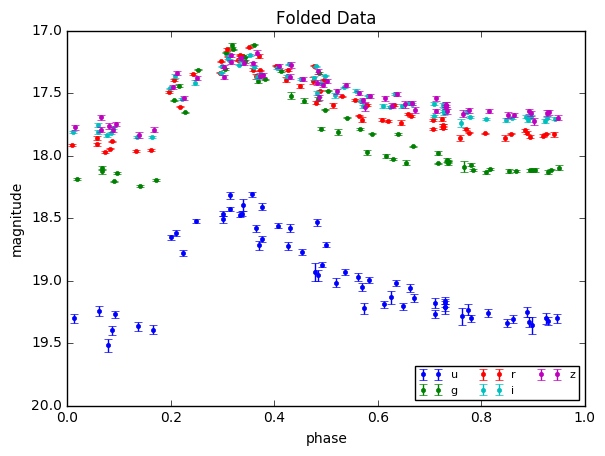

In [178]:
#Plotting the folded light curves for each band
fig = plt.figure(figsize=(14, 5))
gs = plt.GridSpec(5, 2, left=0.10, right=0.95, bottom=0.15,
                  wspace=0.3, hspace=0.6)
ax = [fig.add_subplot(gs[:, 0])]

for band, mask in zip('ugriz', masks):
    ax[0].errorbar(foldTimes[mask], mags[mask], yerr=dmags[mask],fmt='.',label=band)

ax[0].set_ylim(20, 17)
ax[0].legend(loc='lower right', fontsize=8, ncol=3)
ax[0].set_title('Folded Data', fontsize=12)
ax[0].set_xlabel('phase')
ax[0].set_ylabel('magnitude')
plt.show()